<a href="https://colab.research.google.com/github/nanisp/Object-Detection-for-visually-impaired/blob/main/SER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd # data processing ,csv file I/O (e,g pd.read_csv)
import numpy as np  #linear algebra
import wave    #to read and write wave files
import os           #to use operating system dependent functionality        
import matplotlib.pyplot as plt  #to generate the visualizations
import librosa
import seaborn as sns    
import librosa.display
from IPython.display import Audio              

#MLP Classifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

#LSTM Classifier
import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import*
#from keras.optimizer_v1 import rmsprop

print("loaded libraries")

loaded libraries


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
def extract_mfcc(wav_file_name):
  #this functio extracts mfcc features and obtain the mean of each dimension 
  #Input : filename
  #output : mfcc_features
  y,sr=librosa.load(wav_file_name)
  mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
  return mfcc

In [5]:
##### load ravdess speech data #####
ravdess_speech_labels=[] # to save extracted  label or file
ravdess_speech_data=[] # to save extracted  features or file
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio'):
  for filename in filenames:
    ravdess_speech_labels.append(int(filename[7:8]) -1)
    wav_file_name=os.path.join(dirname, filename)
    ravdess_speech_data.append(extract_mfcc(wav_file_name))

print("finish loading the dataset")


finish loading the dataset


In [6]:
ravdess_speech_data

[array([-6.8959656e+02,  5.4805061e+01, -7.9025632e-01,  3.3046741e+00,
         1.9153881e+00,  6.1269259e-01, -1.0669564e+01, -8.4119654e+00,
        -1.1933729e+01,  1.9676811e+00, -4.0655465e+00, -6.0879498e+00,
        -3.8374150e+00,  9.7450930e-01, -1.6204671e+00, -5.1778617e+00,
        -2.5104361e+00, -1.5419170e+00, -6.3540812e+00, -2.4685824e+00,
        -5.8349690e+00, -1.7866211e+00, -6.4663205e+00,  7.3476814e-02,
        -4.6740370e+00, -9.9917091e-02, -2.7513738e+00,  3.4655042e+00,
         3.4792975e-02,  5.1115823e+00,  1.4114929e+00,  3.6311204e+00,
         2.4806927e-01,  5.8472118e+00,  2.4924941e+00,  4.4069219e+00,
         7.7979636e-01,  2.9600954e+00, -8.4199387e-01,  4.8519325e+00],
       dtype=float32),
 array([-7.0548755e+02,  4.5109192e+01,  3.1552172e+00,  9.5945282e+00,
         1.7346902e+00,  1.6872914e+00, -9.1433582e+00, -4.0228000e+00,
        -9.4681520e+00,  4.9803427e-01, -4.9887934e+00, -5.2818222e+00,
        -2.3993926e+00, -7.4279785e-01, 

In [7]:
##### convert data and label to array
ravdess_speech_data_array=np.asarray(ravdess_speech_data)
ravdess_speech_label_array= np.array(ravdess_speech_labels)
ravdess_speech_label_array.shape


##### make categorical labels
labels_categorical=to_categorical(ravdess_speech_label_array)
labels_categorical.shape

(2880, 8)

In [8]:
ravdess_speech_data_array.shape

(2880, 40)

In [9]:
x_train,x_test,y_train,y_test=train_test_split(np.array(ravdess_speech_data_array),labels_categorical,test_size=0.20,random_state=9)


In [10]:
#split the training, validating, and testing sets
number_of_samples=ravdess_speech_data_array.shape[0]
training_samples = int(number_of_samples*0.8)
validation_samples = int(number_of_samples*0.1)
test_samples = int(number_of_samples*0.1)

In [11]:
#define the  LSTM MODEL
def create_model_LSTM():
  model = Sequential()
  model.add(LSTM(128, return_sequences = False, input_shape=(40, 1)))
  model.add(Dense(64))
  model.add(Dropout(0.4))
  model.add(Activation('relu'))
  model.add(Dense(32))
  model.add(Dropout(0.4))
  model.add(Activation('relu'))
  model.add(Dense(8))
  model.add(Activation('softmax'))

  #configures the model for the training
  model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
  return model

In [12]:
w= np.expand_dims(ravdess_speech_data_array[:training_samples], -1)

In [13]:
w.shape

(2304, 40, 1)

In [14]:
## train using LSTM model
model_A = create_model_LSTM()
history = model_A.fit(np.expand_dims(ravdess_speech_data_array[:training_samples], -1),labels_categorical[:training_samples], validation_data=(np.expand_dims(ravdess_speech_data_array[training_samples:training_samples+validation_samples], -1), labels_categorical[training_samples:training_samples+validation_samples]), epochs=130, shuffle=True)

Epoch 1/130
72/72 [==============================] - 6s 54ms/step - loss: 2.0749 - accuracy: 0.1493 - val_loss: 2.0431 - val_accuracy: 0.1424
Epoch 2/130
72/72 [==============================] - 3s 45ms/step - loss: 2.0208 - accuracy: 0.1910 - val_loss: 1.9557 - val_accuracy: 0.2569
Epoch 3/130
72/72 [==============================] - 3s 46ms/step - loss: 1.9725 - accuracy: 0.2244 - val_loss: 1.9152 - val_accuracy: 0.3090
Epoch 4/130
72/72 [==============================] - 4s 60ms/step - loss: 1.9219 - accuracy: 0.2578 - val_loss: 1.8747 - val_accuracy: 0.2986
Epoch 5/130
72/72 [==============================] - 4s 60ms/step - loss: 1.9020 - accuracy: 0.2530 - val_loss: 1.8595 - val_accuracy: 0.2882
Epoch 6/130
72/72 [==============================] - 3s 44ms/step - loss: 1.8621 - accuracy: 0.2947 - val_loss: 1.8589 - val_accuracy: 0.2951
Epoch 7/130
72/72 [==============================] - 3s 46ms/step - loss: 1.8544 - accuracy: 0.2817 - val_loss: 1.8208 - val_accuracy: 0.3160
Epoch 

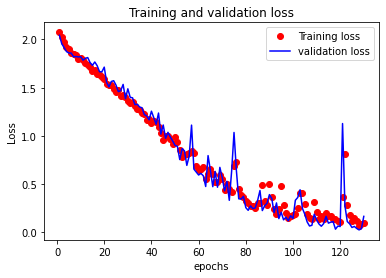

In [15]:
### loss plots using LSTM model
loss= history.history['loss']
val_loss=history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

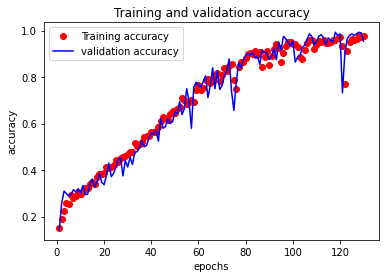

In [16]:
### accuracy plots using LSTM model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In [18]:
### evaluate using model A
model_A.evaluate(np.expand_dims(ravdess_speech_data_array[training_samples+validation_samples:] , -1), labels_categorical[training_samples+validation_samples:])

9/9 [==============================] - 0s 38ms/step - loss: 0.0926 - accuracy: 0.9792


[0.092607282102108, 0.9791666865348816]

In [39]:
emotions={1:'neutral',2:'calm',3:'happy', 4:'sad',5:'angry', 6:'fearful',7:'disgust',8:'surprised'}
def predict(wav_filepath):
  test_point= extract_mfcc(wav_filepath)
  test_point= np.reshape(test_point,newshape=(1,40,1))
  predictions=model_A.predict(test_point)
  print(emotions[np.argmax(predictions[0])+1])

In [ ]:
Audio('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/Actor_01/03-01-03-01-01-02-01.wav')




In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/Actor_01/03-01-03-01-01-02-01.wav')

1/1 [==============================] - 1s 542ms/step
happy


In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/Actor_02/03-01-02-01-01-02-02.wav')

1/1 [==============================] - 0s 32ms/step
calm


In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/Actor_02/03-01-02-02-01-01-02.wav')

1/1 [==============================] - 0s 30ms/step
calm


In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/Actor_02/03-01-03-01-02-02-02.wav')

1/1 [==============================] - 0s 53ms/step
happy


In [56]:
model_A.save('mymodel.h5')

In [57]:
modelc=tf.keras.models.load_model('mymodel.h5')